# Djikstra algorithm explained

[source][https://github.com/thiagolcks/dijkstra]

In [20]:
class Dijkstra:
    
    def __init__(self, input):
        self.input = input
        self.path = []

    def calculate(self):
        return [self.calculateFromOrigin(i) for i, v in enumerate(self.input)]

    def calculateFromOrigin(self, origin):
        distance = [-1] * len(self.input)
        path = [-1] * len(self.input)  # vector to store the best path

        # Distance from origin to itself is always 0
        distance[origin] = 0
        priority = list(range(len(self.input)))  # Convert range to list for Python 3 compatibility

        while priority:
            frm = self.getSmallestPossibleVertex(distance, priority)
            if frm == -1:
                break  # No reachable vertex left
            priority.remove(frm)
            options = self.getOptionList(self.input[frm])
            for position, weight in options:
                dist = distance[frm] + weight
                if distance[position] == -1 or dist < distance[position]:
                    distance[position] = dist
                    path[position] = frm

        self.path.insert(origin, path)
        return distance

    def getSmallestPossibleVertex(self, distances, priority):
        smallestKey = -1
        smallestValue = float('inf')  # Using infinity as initial value for easier comparison
        for i in priority:
            if 0 <= distances[i] < smallestValue:
                smallestValue = distances[i]
                smallestKey = i
        return smallestKey

    def getOptionList(self, vector):
        return [[i, weight] for i, weight in enumerate(vector) if weight > 0]
    
    def getPath(self):
        return self.path
    
    def getBestPath(self, frm, to):
        return [i for i in reversed(self._getBestPath(frm, to, [to]))]
        
    def _getBestPath(self, frm, to, path):
        path_ = self.path[frm]
        lastNode = path_[to]
        path.append(lastNode)
        if lastNode == frm:
            return path
        else:
            return self._getBestPath(frm, lastNode, path)


In [21]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

class GraphHelper:
    
    @staticmethod
    def printGraph(input, featured=None):
        # Luo solmut
        G = nx.DiGraph()
        for el1, vector in enumerate(input):
            for el2, w in enumerate(vector):
                if w > 0: G.add_edge(el1, el2, weight=w)
                
        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        node_labels = {node: node for node in G.nodes()}

        # Suurentaa kuvaa
        plt.figure(figsize=(8, 8), dpi=120)

        # Piirretään peruselementit
        pos = nx.spring_layout(G)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        
        # Asetetaan esitetyn polun väri
        if featured:
            _featured = []
            for k, v in enumerate(featured):
                if k + 1 < len(featured):
                    _featured.append((v, featured[k + 1]))
            edge_colors = ['red' if edge in _featured else 'black' for edge in G.edges()]
        else:
            edge_colors = ['black'] * len(G.edges())  # Muutetaan aina listaksi

        nx.draw(G, pos, node_size=700, node_color='lightblue', edge_color=edge_colors, cmap=plt.cm.Blues)

        plt.show()


## Example

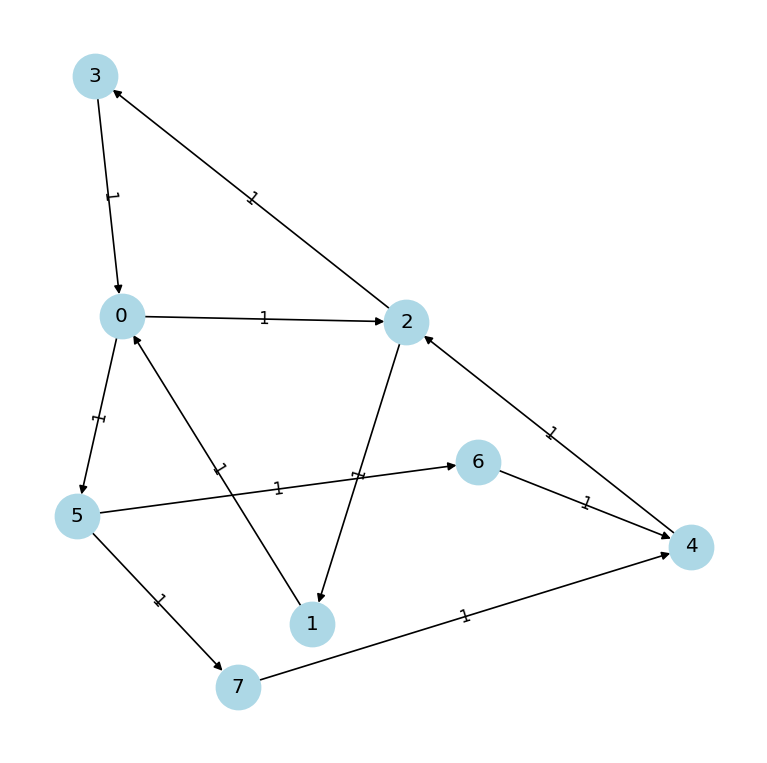

In [23]:
input = [
    [0, 0, 1, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0]
]

GraphHelper.printGraph(input)


## Calculating the minimum path

In [25]:
dj = Dijkstra(input)
result = dj.calculate()

# Print one vector per line
if result:
    for k, v in enumerate(result):
        print("from", k, v)


from 0 [0, 2, 1, 2, 3, 1, 2, 2]
from 1 [1, 0, 2, 3, 4, 2, 3, 3]
from 2 [2, 1, 0, 1, 5, 3, 4, 4]
from 3 [1, 3, 2, 0, 4, 2, 3, 3]
from 4 [3, 2, 1, 2, 0, 4, 5, 5]
from 5 [5, 4, 3, 4, 2, 0, 1, 1]
from 6 [4, 3, 2, 3, 1, 5, 0, 6]
from 7 [4, 3, 2, 3, 1, 5, 6, 0]


## Plotting some examples

### From 2 to 4

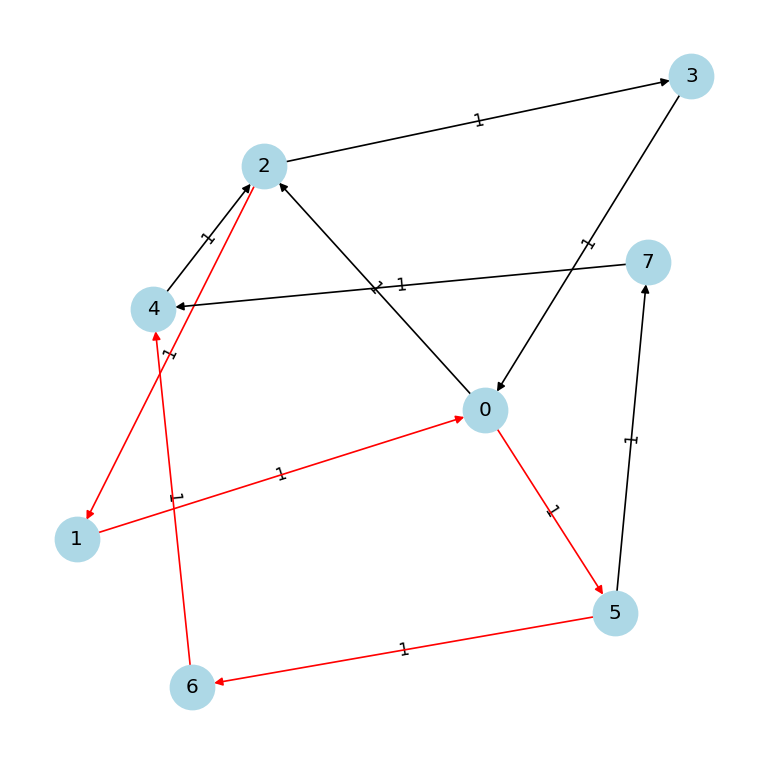

In [26]:
# Alustetaan Dijkstra-olio dj, jos sitä ei ole jo tehty
dj = Dijkstra(input)

# Lasketaan reitit ja saadaan paras reitti solmusta 2 solmuun 4
result = dj.calculate()
best_path = dj.getBestPath(2, 4)

# Piirretään graafi esitettynä parhaalla reitillä
GraphHelper.printGraph(input, best_path)


### From 0 to 4

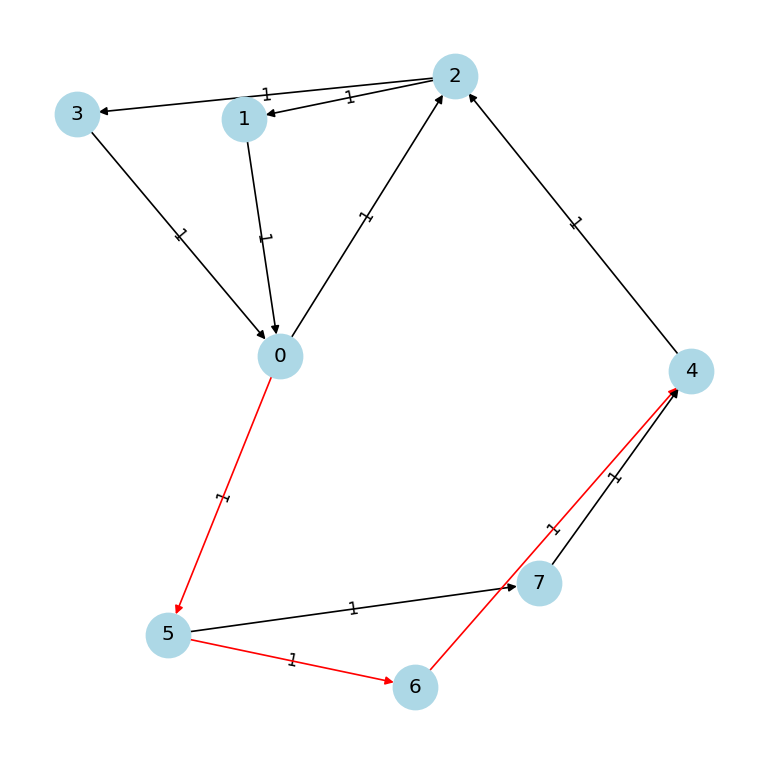

In [27]:
# Alustetaan Dijkstra-olio dj, jos sitä ei ole jo tehty
dj = Dijkstra(input)

# Lasketaan reitit ja saadaan paras reitti solmusta 0 solmuun 4
result = dj.calculate()
best_path = dj.getBestPath(0, 4)

# Piirretään graafi esitettynä parhaalla reitillä
GraphHelper.printGraph(input, best_path)

### From 4 to 0

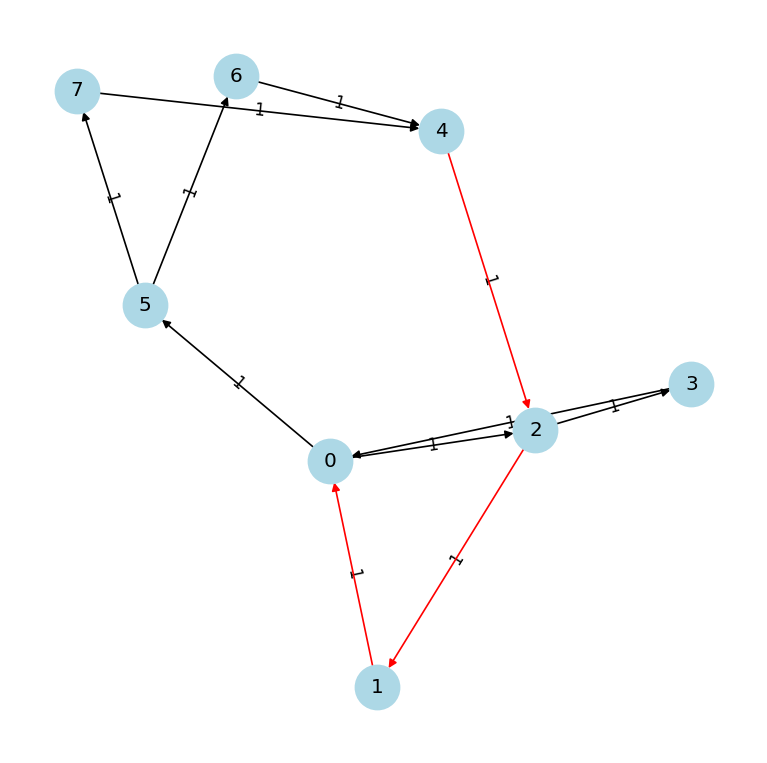

In [28]:
# Alustetaan Dijkstra-olio dj, jos sitä ei ole jo tehty
dj = Dijkstra(input)

# Lasketaan reitit ja saadaan paras reitti solmusta 4 solmuun 0
result = dj.calculate()
best_path = dj.getBestPath(4, 0)

# Piirretään graafi esitettynä parhaalla reitillä
GraphHelper.printGraph(input, best_path)

# Example 2 - With Cost

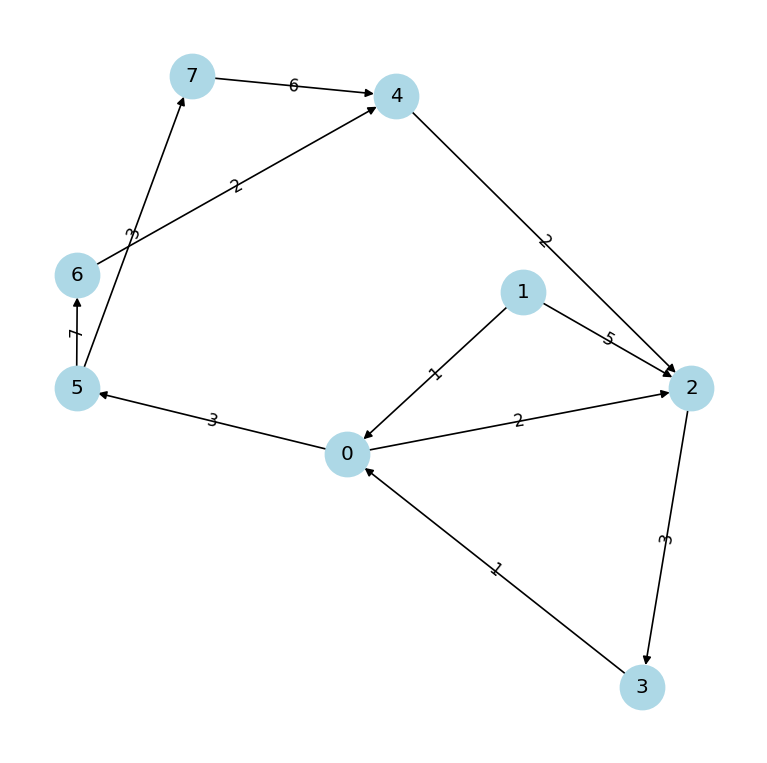

In [29]:
input = [[0,0,2,0,0,3,0,0],
        [1,0,5,0,0,0,0,0],
        [0,0,0,3,0,0,0,0],
        [1,0,0,0,0,0,0,0],
        [0,0,2,0,0,0,0,0],
        [0,0,0,0,0,0,7,3],
        [0,0,0,0,2,0,0,0],
        [0,0,0,0,6,0,0,0]]

GraphHelper.printGraph(input)

### From 1 to 2

from 0 [0, -1, 2, 5, 12, 3, 10, 6]
from 1 [1, 0, 3, 6, 13, 4, 11, 7]
from 2 [4, -1, 0, 3, 16, 7, 14, 10]
from 3 [1, -1, 3, 0, 13, 4, 11, 7]
from 4 [6, -1, 2, 5, 0, 9, 16, 12]
from 5 [15, -1, 11, 14, 9, 0, 7, 3]
from 6 [8, -1, 4, 7, 2, 11, 0, 14]
from 7 [12, -1, 8, 11, 6, 15, 22, 0]


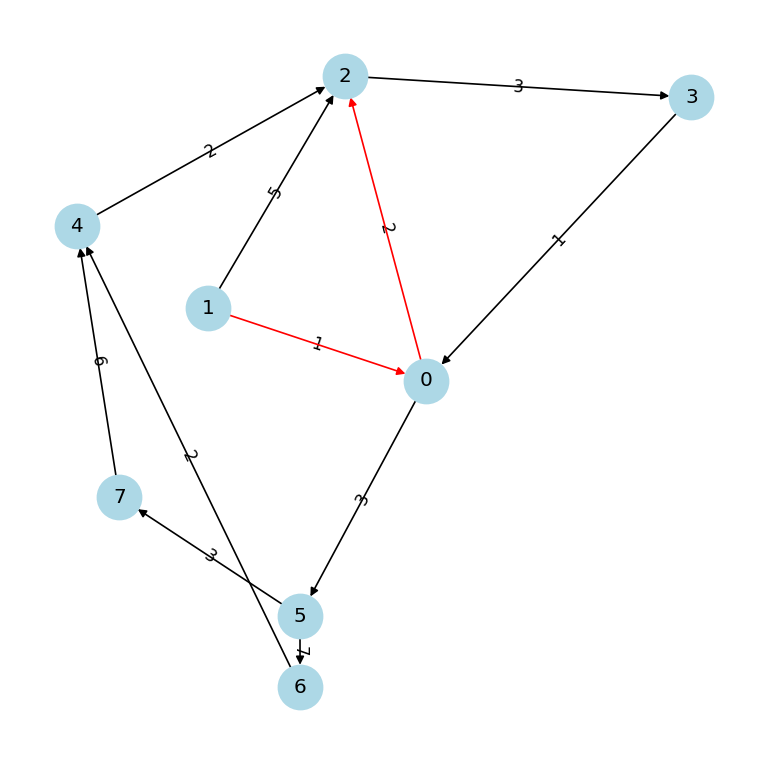

In [30]:
dj = Dijkstra(input)
result = dj.calculate()

# Print one vector per line
if result:
    for k, v in enumerate(result):
        print("from", k, v)

GraphHelper.printGraph(input, dj.getBestPath(1, 2))